In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [300]:
sp500 = pd.read_csv('sp500_ohlc.csv')
nasdaq = pd.read_csv('nasdaq_ohlc.csv')

In [301]:
nasdaq = nasdaq.loc[2:,:]
nasdaq.rename(columns={'Price':'Date'}, inplace=True)
print(nasdaq.columns)
nasdaq.set_index('Date', inplace=True)

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


<AxesSubplot: title={'center': 'Liczba akcji kupionych/sprzedanych w ciągu dnia (NASDAQ)'}, xlabel='Data', ylabel='Ilość akcji'>

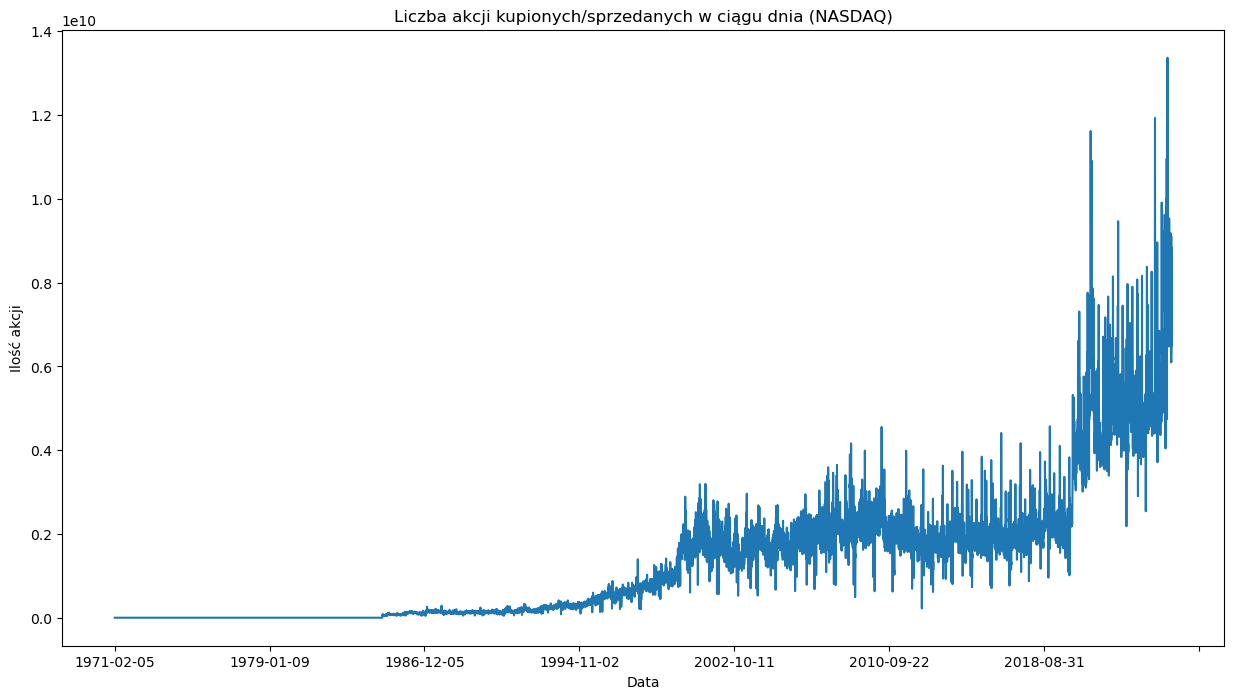

In [302]:
nasdaq = nasdaq.apply(pd.to_numeric)
nasdaq.iloc[:, -1].plot(figsize=(15,8), title='Liczba akcji kupionych/sprzedanych w ciągu dnia (NASDAQ)', xlabel='Data', ylabel='Ilość akcji')

<AxesSubplot: title={'center': 'Cena zamknięcia akcji w czasie (NASDAQ)'}, xlabel='Data', ylabel='Cena (USD)'>

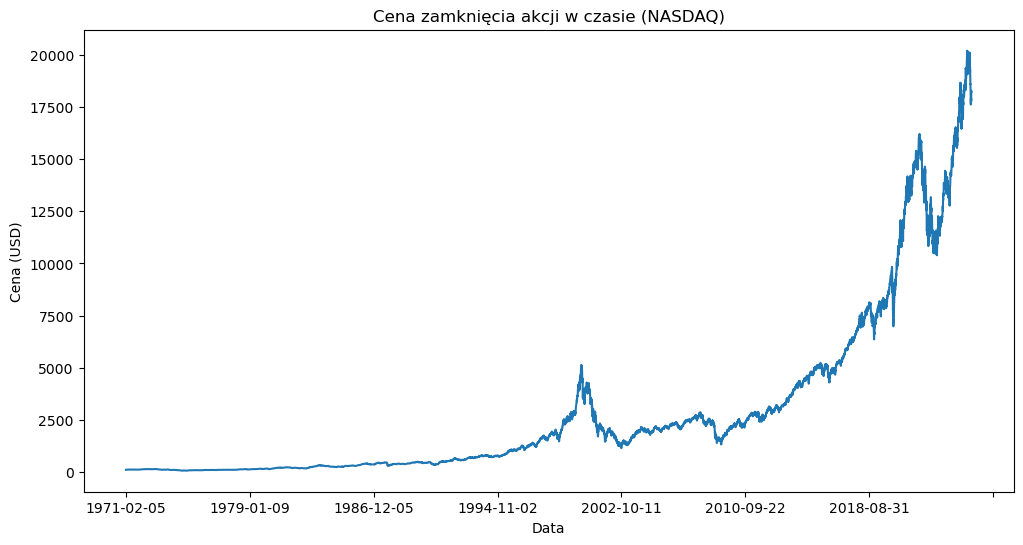

In [303]:
nasdaq.iloc[:, 1].plot(figsize=(12,6), title='Cena zamknięcia akcji w czasie (NASDAQ)', xlabel='Data', ylabel='Cena (USD)')

In [304]:
sp500 = sp500.loc[2:,:]
sp500.rename(columns={'Price':'Date'}, inplace=True)
print(sp500.columns)
sp500.set_index('Date', inplace=True)

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


<AxesSubplot: title={'center': 'Liczba akcji kupionych/sprzedanych w czasie (S&P 500)'}, xlabel='Data', ylabel='Ilość akcji'>

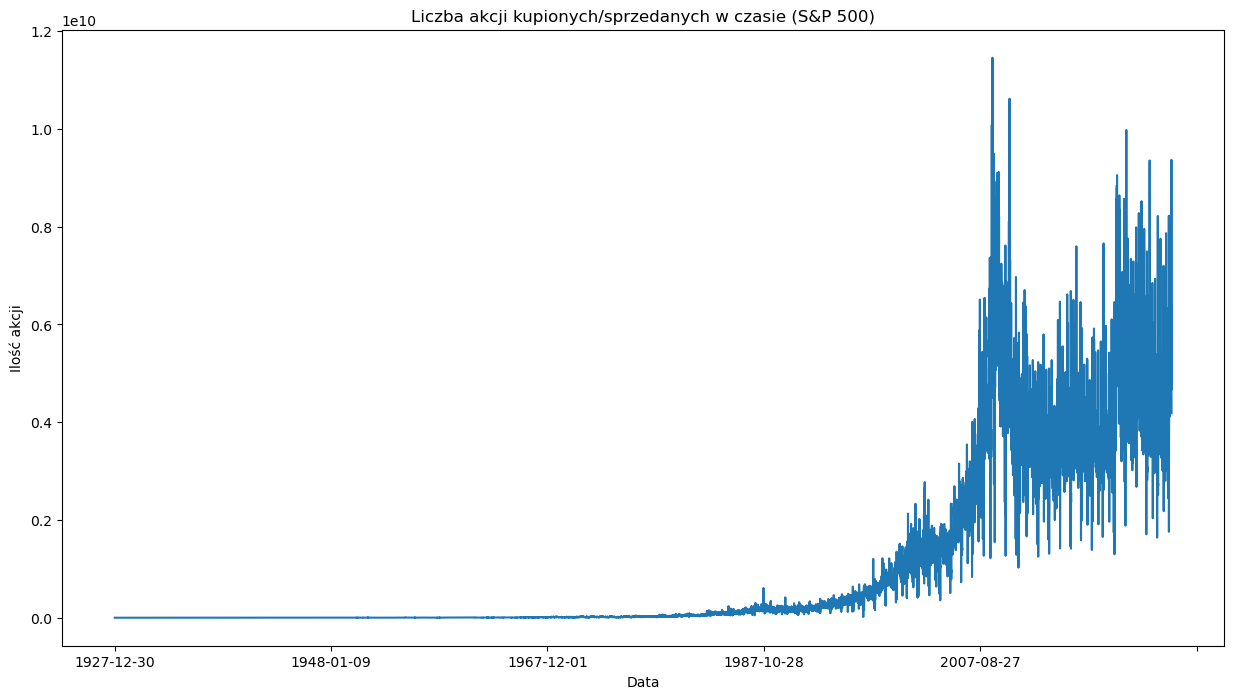

In [305]:
sp500 = sp500.apply(pd.to_numeric)
sp500.iloc[:, -1].plot(figsize=(15,8), title='Liczba akcji kupionych/sprzedanych w czasie (S&P 500)', xlabel='Data', ylabel='Ilość akcji')

<AxesSubplot: title={'center': 'Cena zamknięcia akcji w czasie (S&P 500)'}, xlabel='Data', ylabel='Ilość akcji'>

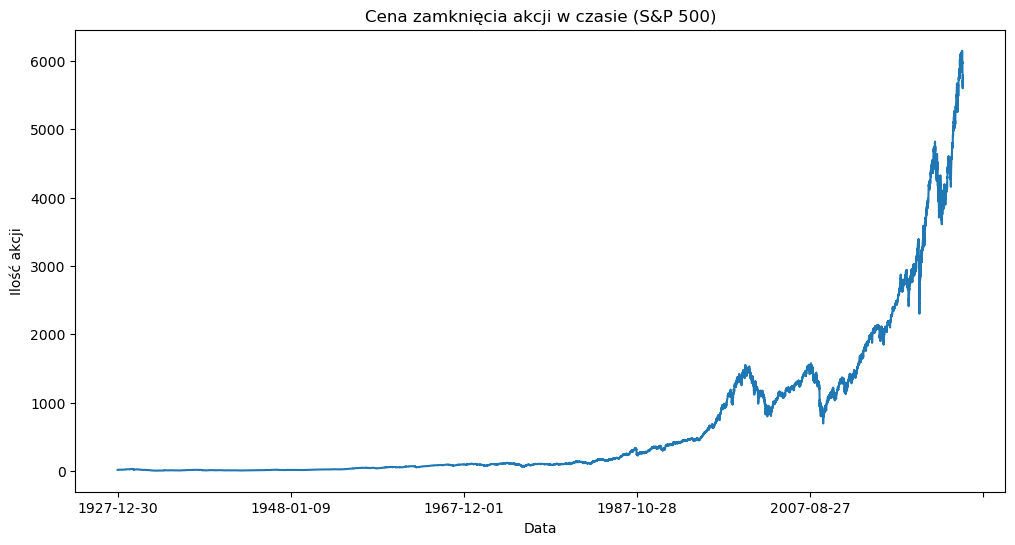

In [306]:
sp500.iloc[:, 1].plot(figsize=(12,6), title='Cena zamknięcia akcji w czasie (S&P 500)', xlabel='Data', ylabel='Ilość akcji')

### Wyodrębnienie danych tylko z 21 wieku

In [307]:
nasdaq = nasdaq.loc['1999-10-21':]
sp500 = sp500.loc['1999-10-21':]

sp500.head()

,Close,High,Low,Open,Volume
Date,,,,,
1999-10-21,1283.609985,1289.430054,1265.609985,1289.430054,1012500000
1999-10-22,1301.650024,1308.810059,1283.609985,1283.609985,959200000
1999-10-25,1293.630005,1301.680054,1286.069946,1301.650024,777000000
1999-10-26,1281.910034,1303.459961,1281.859985,1293.630005,878300000
1999-10-27,1296.709961,1299.390015,1280.479980,1281.910034,950100000


<AxesSubplot: title={'center': 'Ilość akcji kupionych/sprzedanych w czasie (NASDAQ)'}, xlabel='Data', ylabel='Ilość akcji'>

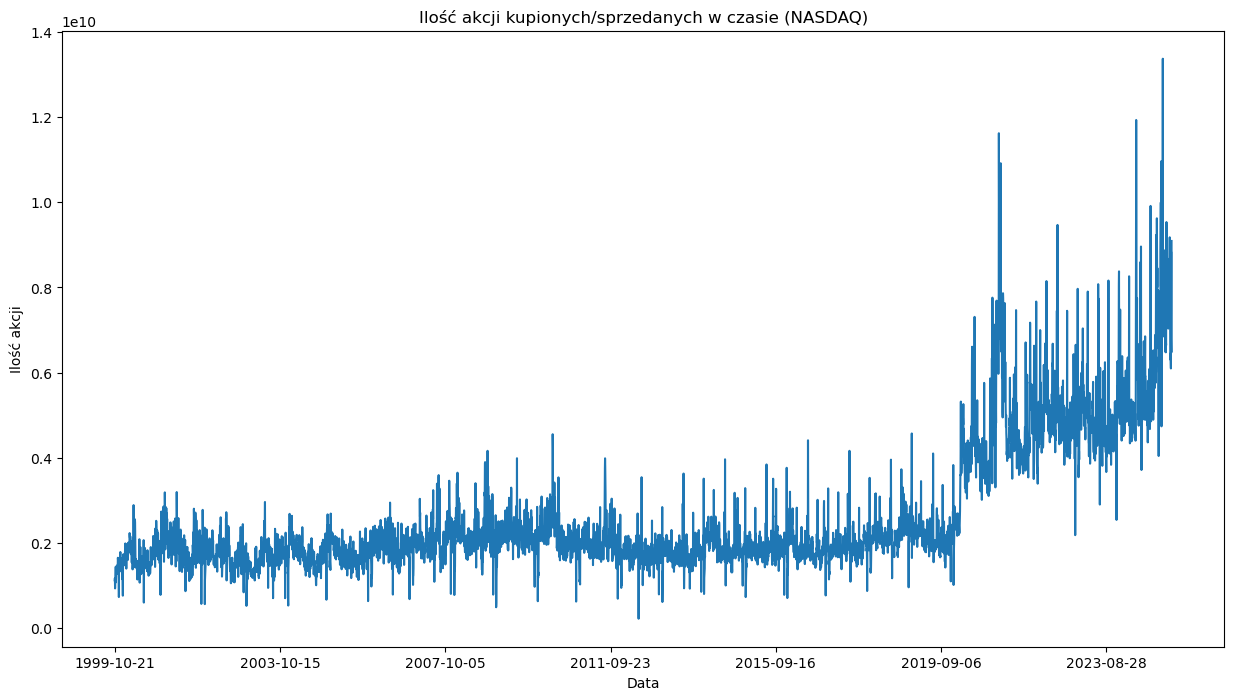

In [308]:
nasdaq.iloc[:, -1].plot(figsize=(15, 8), title='Ilość akcji kupionych/sprzedanych w czasie (NASDAQ)', xlabel='Data', ylabel='Ilość akcji')

<AxesSubplot: title={'center': 'Cena zamknięcia akcji w czasie (NASDAQ)'}, xlabel='Data', ylabel='Ilość akcji'>

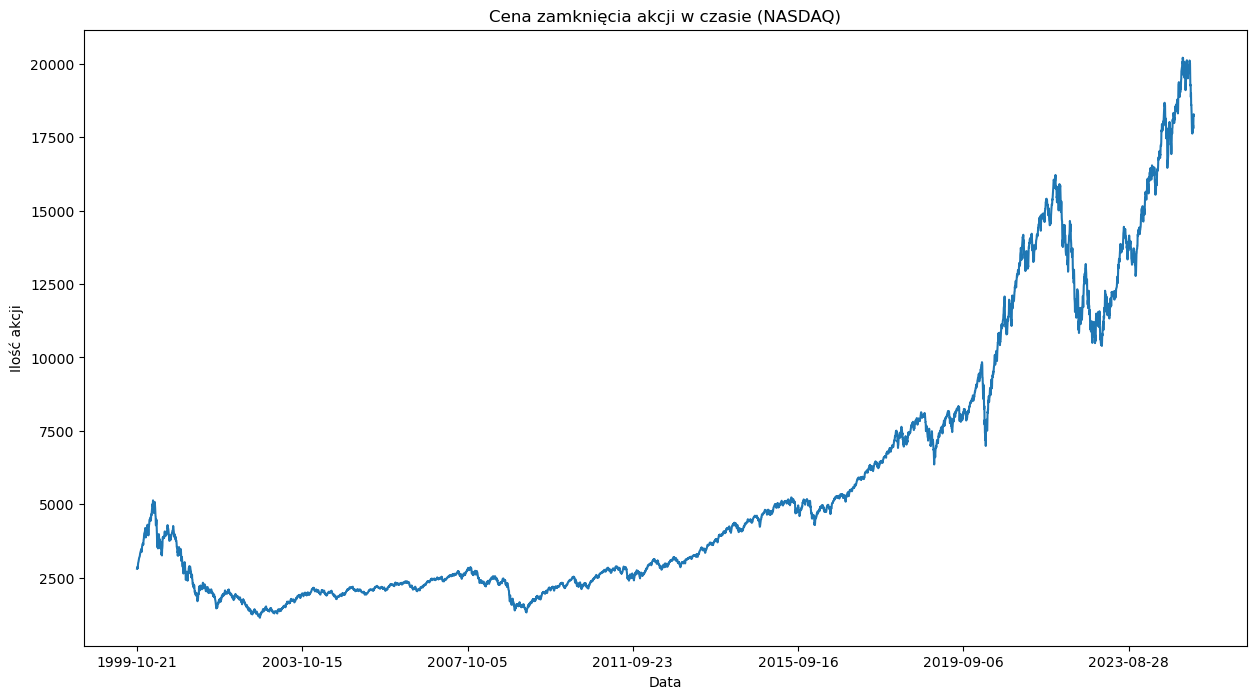

In [309]:
nasdaq.iloc[:, 1].plot(figsize=(15, 8), title='Cena zamknięcia akcji w czasie (NASDAQ)', xlabel='Data', ylabel='Ilość akcji')

<AxesSubplot: title={'center': 'Ilość akcji kupionych/sprzedanych w czasie (S&P 500)'}, xlabel='Data', ylabel='Ilość akcji'>

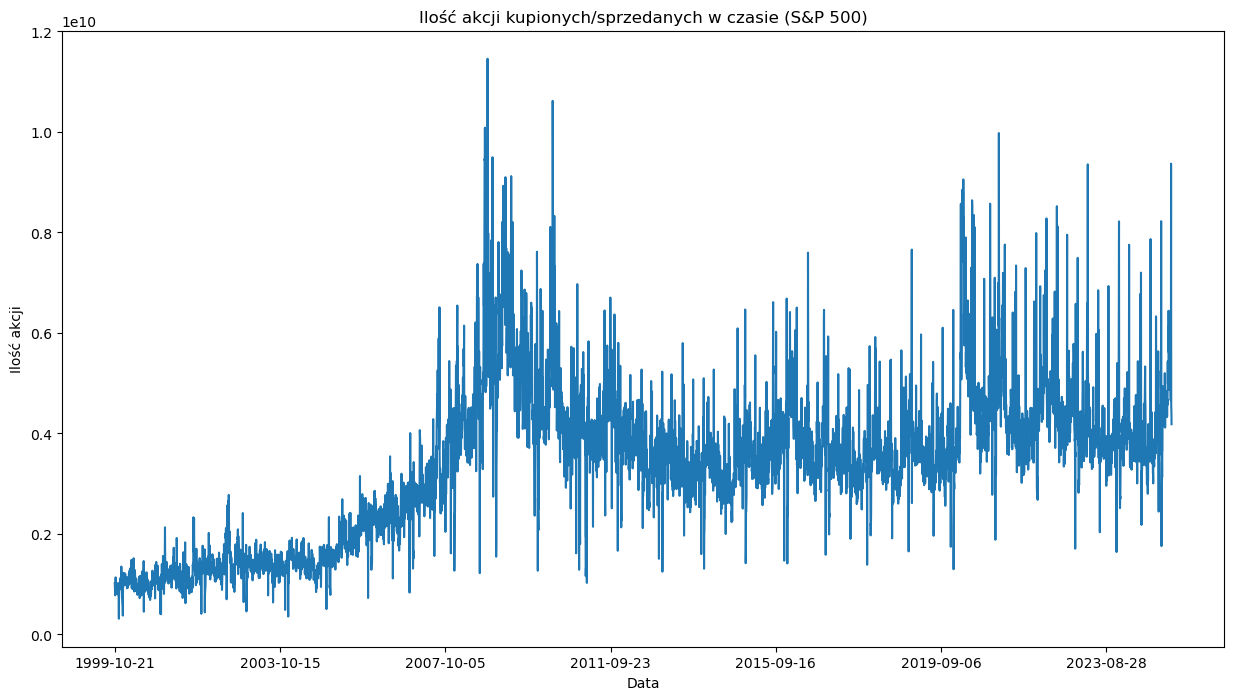

In [310]:
sp500.iloc[:, -1].plot(figsize=(15, 8), title='Ilość akcji kupionych/sprzedanych w czasie (S&P 500)', xlabel='Data', ylabel='Ilość akcji')

### Kodowanie i obliczanie entropii

In [311]:
from encoding import calculate_encoding, calculate_entropy

alpha_values = np.array([0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], dtype=float)
alpha_values

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

##### S&P 500

Obliczenie entropii - (-1, 0, 1) w zależności od α*σ, gdzie α = [0.05, 0.10, 0.15, ..., 1.00]

'Close'

In [312]:
sp500a = calculate_encoding(sp500.iloc[49:,:], 'Close', alpha=0.05)
for a in alpha_values:
    sp500a = calculate_encoding(sp500a, 'Close', alpha=a)

/home/persi/Desktop/quant/encoding.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'encoding_{column}_{alpha}'] = 0
/home/persi/Desktop/quant/encoding.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'encoding_{column}_{alpha}'] = 0
/home/persi/Desktop/quant/encoding.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [313]:
alpha_values[0] = 0.05
results = []
for a in alpha_values:
    res = calculate_entropy(sp500a.iloc[1:,:], f'encoding_Close_{a}')
    results.append(res)
    print(f'Entropia Shannona dla Close, alpha = {a}:', res)
    display(sp500a.iloc[1:,:][f'encoding_Close_{a}'].value_counts(normalize=True))


Entropia Shannona dla Close, alpha = 0.05: 1.1327084570904438


encoding_Close_0.05
-1    0.630949
 1    0.329026
 0    0.040025
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.15: 1.2988775851832404


encoding_Close_0.15
-1    0.585408
 1    0.320674
 0    0.093917
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.2: 1.3477551003836628


encoding_Close_0.2
-1    0.572487
 1    0.309801
 0    0.117712
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.25: 1.3938651584523267


encoding_Close_0.25
-1    0.556413
 1    0.299874
 0    0.143713
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.3: 1.4159076047547017


encoding_Close_0.3
-1    0.548377
 1    0.292625
 0    0.158998
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.35: 1.4299051652828547


encoding_Close_0.35
-1    0.543807
 1    0.285061
 0    0.171131
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.4: 1.4547104930370516


encoding_Close_0.4
-1    0.531673
 1    0.275764
 0    0.192562
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.45: 1.4679243424795996


encoding_Close_0.45
-1    0.526001
 1    0.263000
 0    0.210999
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.5: 1.498888262120679


encoding_Close_0.5
-1    0.501103
 0    0.250394
 1    0.248503
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.55: 1.5286238831384287


encoding_Close_0.55
-1    0.460290
 0    0.304759
 1    0.234951
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.6: 1.5397372819653443


encoding_Close_0.6
-1    0.406555
 0    0.372676
 1    0.220769
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.65: 1.5245939998371654


encoding_Close_0.65
 0    0.440277
-1    0.348881
 1    0.210841
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.7: 1.4793400662192688


encoding_Close_0.7
 0    0.510085
-1    0.286637
 1    0.203278
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.75: 1.4049791433646674


encoding_Close_0.75
 0    0.576899
-1    0.223605
 1    0.199496
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.8: 1.2798809966499165


encoding_Close_0.8
 0    0.650488
 1    0.194611
-1    0.154901
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.85: 1.1373013096868003


encoding_Close_0.85
 0    0.710369
 1    0.189883
-1    0.099748
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.9: 1.0444564117366255


encoding_Close_0.9
 0    0.742042
 1    0.185629
-1    0.072329
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.95: 0.9702324442614182


encoding_Close_0.95
 0    0.764891
 1    0.180744
-1    0.054365
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 1.0: 0.8126971172437732


encoding_Close_1.0
 0    0.802553
 1    0.176647
-1    0.020801
Name: proportion, dtype: float64

Text(0, 0.5, 'Entropia Shannona')

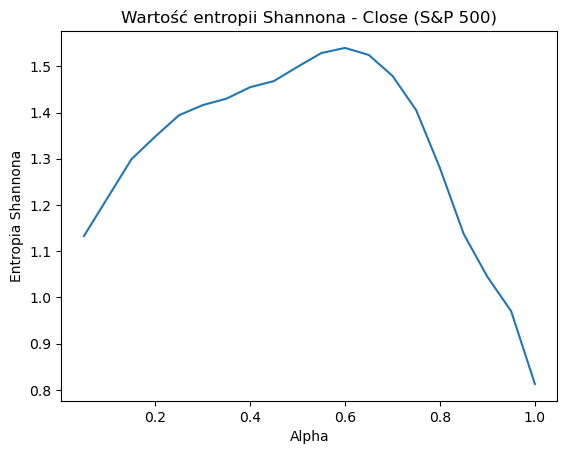

In [314]:
plt.plot(alpha_values, results)
plt.title('Wartość entropii Shannona - Close (S&P 500)')
plt.xlabel('Alpha')
plt.ylabel('Entropia Shannona')

In [315]:
sp500a = calculate_encoding(sp500.iloc[49:,:], 'Volume', alpha=0.05)
for a in alpha_values:
    sp500a = calculate_encoding(sp500a, 'Volume', alpha=a)

/home/persi/Desktop/quant/encoding.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'encoding_{column}_{alpha}'] = 0
/home/persi/Desktop/quant/encoding.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'encoding_{column}_{alpha}'] = 0
/home/persi/Desktop/quant/encoding.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [316]:
results = []
for a in alpha_values:
    res = calculate_entropy(sp500a.iloc[1:,:], f'encoding_Volume_{a}')
    results.append(res)
    print(f'Entropia Shannona dla Volume, alpha = {a}:', res)
    display(sp500a.iloc[1:,:][f'encoding_Volume_{a}'].value_counts(normalize=True))


Entropia Shannona dla Volume, alpha = 0.05: 1.2480756646099886


encoding_Volume_0.05
 1    0.518594
-1    0.425622
 0    0.055783
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.15: 1.467241840214441


encoding_Volume_0.15
 1    0.459660
-1    0.381658
 0    0.158683
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.2: 1.5223751088562816


encoding_Volume_0.2
 1    0.431453
-1    0.363851
 0    0.204696
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.25: 1.5601725291386157


encoding_Volume_0.25
 1    0.401355
-1    0.345257
 0    0.253388
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.3: 1.5777976671595928


encoding_Volume_0.3
 1    0.374409
-1    0.332493
 0    0.293098
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.35: 1.5844130062623982


encoding_Volume_0.35
 1    0.344627
 0    0.333281
-1    0.322093
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.4: 1.5800382858959063


encoding_Volume_0.4
 0    0.372361
 1    0.317680
-1    0.309959
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.45: 1.5679785470171526


encoding_Volume_0.45
 0    0.406713
-1    0.299874
 1    0.293413
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.5: 1.5493955559721524


encoding_Volume_0.5
 0    0.439332
-1    0.291365
 1    0.269303
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.55: 1.527747041567535


encoding_Volume_0.55
 0    0.467854
-1    0.282225
 1    0.249921
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.6: 1.501857090671244


encoding_Volume_0.6
 0    0.495273
-1    0.274504
 1    0.230224
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.65: 1.470881544201145


encoding_Volume_0.65
 0    0.523007
-1    0.265994
 1    0.210999
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.7: 1.4442895567297411


encoding_Volume_0.7
 0    0.544122
-1    0.258588
 1    0.197290
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.75: 1.413110000154786


encoding_Volume_0.75
 0    0.566341
-1    0.251024
 1    0.182635
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.8: 1.3805806779295562


encoding_Volume_0.8
 0    0.586826
-1    0.245667
 1    0.167507
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.85: 1.3508279945965596


encoding_Volume_0.85
 0    0.604948
-1    0.238260
 1    0.156792
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.9: 1.3171829316609371


encoding_Volume_0.9
 0    0.623227
-1    0.232903
 1    0.143870
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.95: 1.2853581023656655


encoding_Volume_0.95
 0    0.640088
-1    0.225969
 1    0.133943
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 1.0: 1.2544097384039268


encoding_Volume_1.0
 0    0.655531
-1    0.219666
 1    0.124803
Name: proportion, dtype: float64

'Volume'

Text(0, 0.5, 'Entropia Shannona')

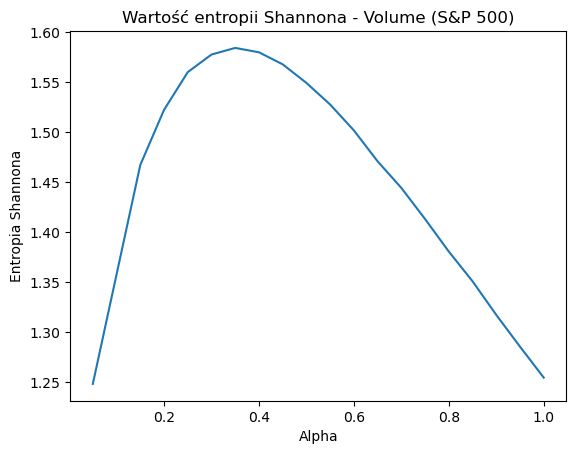

In [317]:
plt.plot(alpha_values, results)
plt.title('Wartość entropii Shannona - Volume (S&P 500)')
plt.xlabel('Alpha')
plt.ylabel('Entropia Shannona')

Binarna entropia - (-1, 1)

In [318]:
sp500 = calculate_encoding(sp500.iloc[49:,:], 'Close', binary=True)
sp500 = calculate_encoding(sp500, 'Volume', binary=True)

/home/persi/Desktop/quant/encoding.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'binary_encoding_{column}'] = 0


In [319]:
print('Entropia Shannona dla Close:', calculate_entropy(sp500.iloc[1:,:], 'binary_encoding_Close'))
display(sp500.iloc[1:,:]['binary_encoding_Close'].value_counts(normalize=True))

print('Entropia Shannona dla Volume:', calculate_entropy(sp500.iloc[1:,:], 'binary_encoding_Volume'))
sp500.iloc[1:,:]['binary_encoding_Volume'].value_counts(normalize=True)


Entropia Shannona dla Close: 1.001685386177176


binary_encoding_Close
 1    0.535771
-1    0.463757
 0    0.000473
Name: proportion, dtype: float64


Entropia Shannona dla Volume: 1.0164952204454614


binary_encoding_Volume
-1    0.506776
 1    0.491491
 0    0.001733
Name: proportion, dtype: float64

In [320]:
sp500.loc[sp500['binary_encoding_Close'] == 0]

,Close,High,Low,Open,Volume,binary_encoding_Close,binary_encoding_Volume
Date,,,,,,,
1999-12-31,1469.250000,1472.420044,1458.189941,1464.469971,374050000,0,0
2003-01-10,927.570007,932.890015,917.659973,927.580017,1485400000,0,-1
2008-01-03,1447.160034,1456.800049,1443.729980,1447.550049,3429500000,0,-1
2017-01-10,2268.899902,2279.270020,2265.270020,2269.719971,3640560000,0,1


In [321]:
sp500.loc[sp500['binary_encoding_Volume'] == 0]

,Close,High,Low,Open,Volume,binary_encoding_Close,binary_encoding_Volume
Date,,,,,,,
1999-12-31,1469.250000,1472.420044,1458.189941,1464.469971,374050000,0,0
2004-04-01,1132.170044,1135.670044,1126.199951,1126.209961,1560700000,1,0
2010-08-10,1121.060059,1127.160034,1111.579956,1122.920044,3979360000,-1,0
2010-09-14,1121.099976,1127.359985,1115.579956,1121.160034,4521050000,-1,0
2010-10-14,1173.810059,1178.890015,1166.709961,1177.819946,4969410000,-1,0
2011-01-21,1283.349976,1291.209961,1282.069946,1283.630005,4935320000,1,0
2011-02-17,1340.430054,1341.500000,1331.000000,1334.369995,1966450000,1,0
2011-03-25,1313.800049,1319.180054,1310.150024,1311.800049,4223740000,1,0
2011-04-04,1332.869995,1336.739990,1329.099976,1333.560059,4223740000,1,0


##### NASDAQ

In [327]:
alpha_values = np.array([0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], dtype=float)
alpha_values

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [341]:
nasdaq_a = calculate_encoding(nasdaq.iloc[49:,:], 'Close', alpha=0.05)
for a in alpha_values:
    nasdaq_a = calculate_encoding(nasdaq_a, 'Close', alpha=a)

/home/persi/Desktop/quant/encoding.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'encoding_{column}_{alpha}'] = 0
/home/persi/Desktop/quant/encoding.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'encoding_{column}_{alpha}'] = 0
/home/persi/Desktop/quant/encoding.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [342]:
alpha_values[0] = 0.05
results = []
for a in alpha_values:
    res = calculate_entropy(nasdaq_a.iloc[1:,:], f'encoding_Close_{a}')
    results.append(res)
    print(f'Entropia Shannona dla Close, alpha = {a}:', res)
    display(nasdaq_a.iloc[1:,:][f'encoding_Close_{a}'].value_counts(normalize=True))


Entropia Shannona dla Close, alpha = 0.05: 0.9779267718913793


encoding_Close_0.05
-1    0.667778
 1    0.323011
 0    0.009211
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.15: 1.2293277402952514


encoding_Close_0.15
-1    0.619343
 1    0.306495
 0    0.074162
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.2: 1.3152461299687166


encoding_Close_0.2
-1    0.593298
 1    0.298078
 0    0.108623
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.25: 1.3664159452657347


encoding_Close_0.25
-1    0.573924
 1    0.292520
 0    0.133556
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.3: 1.4076511457459615


encoding_Close_0.3
-1    0.557408
 1    0.283310
 0    0.159282
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.35: 1.4470409953155383


encoding_Close_0.35
-1    0.538034
 1    0.272352
 0    0.189614
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.4: 1.4732694159951822


encoding_Close_0.4
-1    0.522789
 1    0.258695
 0    0.218517
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.45: 1.4892107632838965


encoding_Close_0.45
-1    0.510402
 1    0.248372
 0    0.241226
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.5: 1.5003912452319002


encoding_Close_0.5
-1    0.497539
 0    0.270129
 1    0.232333
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.55: 1.514031907063123


encoding_Close_0.55
-1    0.471494
 0    0.311259
 1    0.217246
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.6: 1.526452870365632


encoding_Close_0.6
-1    0.435287
 0    0.353502
 1    0.211212
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.65: 1.526580417247243


encoding_Close_0.65
 0    0.415912
-1    0.377958
 1    0.206130
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.7: 1.493348616091637


encoding_Close_0.7
 0    0.491504
-1    0.305384
 1    0.203113
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.75: 1.379637577912099


encoding_Close_0.75
 0    0.59441
-1    0.20613
 1    0.19946
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.8: 1.1715439226140505


encoding_Close_0.8
 0    0.695887
 1    0.196284
-1    0.107829
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.85: 1.0258186793992914


encoding_Close_0.85
 0    0.743846
 1    0.193902
-1    0.062252
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.9: 0.8765502485958062


encoding_Close_0.9
 0    0.781324
 1    0.191361
-1    0.027315
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 0.95: 0.7084657324604149


encoding_Close_0.95
 0    0.809592
 1    0.189773
-1    0.000635
Name: proportion, dtype: float64


Entropia Shannona dla Close, alpha = 1.0: 0.6983281927341912


encoding_Close_1.0
0    0.811498
1    0.188502
Name: proportion, dtype: float64

Text(0, 0.5, 'Entropia Shannona')

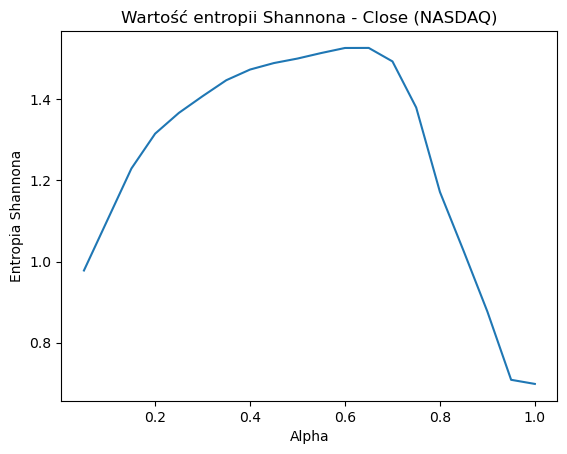

In [343]:
plt.plot(alpha_values, results)
plt.title('Wartość entropii Shannona - Close (NASDAQ)')
plt.xlabel('Alpha')
plt.ylabel('Entropia Shannona')

'Volume'

In [344]:
nasdaq_a = calculate_encoding(nasdaq.iloc[49:,:], 'Volume', alpha=0.05)
for a in alpha_values:
    nasdaq_a = calculate_encoding(nasdaq_a, 'Volume', alpha=a)

/home/persi/Desktop/quant/encoding.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'encoding_{column}_{alpha}'] = 0
/home/persi/Desktop/quant/encoding.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'encoding_{column}_{alpha}'] = 0
/home/persi/Desktop/quant/encoding.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [345]:
results = []
for a in alpha_values:
    res = calculate_entropy(nasdaq_a.iloc[1:,:], f'encoding_Volume_{a}')
    results.append(res)
    print(f'Entropia Shannona dla Volume, alpha = {a}:', res)
    display(nasdaq_a.iloc[1:,:][f'encoding_Volume_{a}'].value_counts(normalize=True))


Entropia Shannona dla Volume, alpha = 0.05: 0.9262061181136568


encoding_Volume_0.05
-1    0.742099
 1    0.237573
 0    0.020327
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.15: 1.1063090101546247


encoding_Volume_0.15
-1    0.705256
 1    0.225663
 0    0.069081
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.2: 1.1970719530139378


encoding_Volume_0.2
-1    0.677465
 1    0.220899
 0    0.101636
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.25: 1.2766134891671206


encoding_Volume_0.25
-1    0.646498
 1    0.218040
 0    0.135461
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.3: 1.3638895648259166


encoding_Volume_0.3
-1    0.602986
 1    0.216293
 0    0.180721
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.35: 1.4326419080638448


encoding_Volume_0.35
-1    0.557408
 0    0.229316
 1    0.213276
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.4: 1.4922713974857227


encoding_Volume_0.4
-1    0.498650
 0    0.290297
 1    0.211053
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.45: 1.5256160303899646


encoding_Volume_0.45
-1    0.430364
 0    0.361283
 1    0.208353
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.5: 1.5227345506113346


encoding_Volume_0.5
 0    0.435922
-1    0.357472
 1    0.206606
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.55: 1.4816953712173517


encoding_Volume_0.55
 0    0.508178
-1    0.286962
 1    0.204859
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.6: 1.4009758545412994


encoding_Volume_0.6
 0    0.580118
-1    0.216611
 1    0.203271
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.65: 1.2903596147554328


encoding_Volume_0.65
 0    0.644593
 1    0.199460
-1    0.155947
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.7: 1.1820492856284202


encoding_Volume_0.7
 0    0.691440
 1    0.197872
-1    0.110688
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.75: 1.0800739016628549


encoding_Volume_0.75
 0    0.727330
 1    0.195172
-1    0.077497
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.8: 0.9876565345426948


encoding_Volume_0.8
 0    0.75528
 1    0.19152
-1    0.05320
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.85: 0.9135431357611891


encoding_Volume_0.85
 0    0.774813
 1    0.188661
-1    0.036525
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.9: 0.8495722207327452


encoding_Volume_0.9
 0    0.790218
 1    0.185485
-1    0.024297
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 0.95: 0.7924351717696093


encoding_Volume_0.95
 0    0.803398
 1    0.181356
-1    0.015245
Name: proportion, dtype: float64


Entropia Shannona dla Volume, alpha = 1.0: 0.7595648935835092


encoding_Volume_1.0
 0    0.811656
 1    0.177068
-1    0.011275
Name: proportion, dtype: float64

Text(0, 0.5, 'Entropia Shannona')

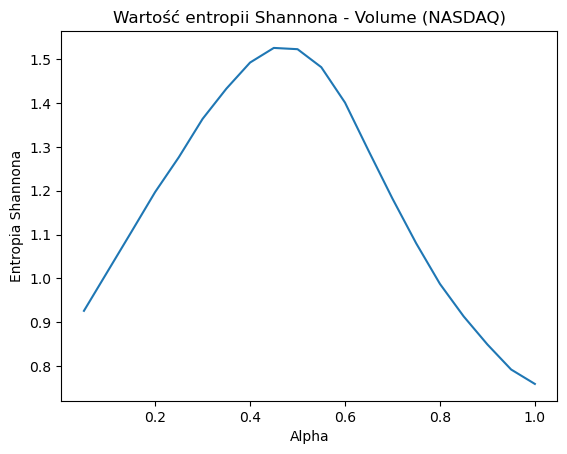

In [346]:
plt.plot(alpha_values, results)
plt.title('Wartość entropii Shannona - Volume (NASDAQ)')
plt.xlabel('Alpha')
plt.ylabel('Entropia Shannona')

In [336]:
nasdaq = calculate_encoding(nasdaq.iloc[49:,:], 'Close', binary=True)
nasdaq = calculate_encoding(nasdaq, 'Volume', binary=True)
nasdaq

/home/persi/Desktop/quant/encoding.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'binary_encoding_{column}'] = 0


,Close,High,Low,Open,Volume,binary_encoding_Close,binary_encoding_Volume
Date,,,,,,,
1999-12-31,4069.310059,4082.370117,4032.330078,4056.989990,762980000,0,0
2000-01-03,4131.149902,4192.189941,3989.709961,4186.189941,1510070000,1,1
2000-01-04,3901.689941,4073.250000,3898.229980,4020.000000,1511840000,-1,1
2000-01-05,3877.540039,3924.209961,3734.870117,3854.350098,1735670000,-1,1
2000-01-06,3727.129883,3868.760010,3715.620117,3834.439941,1598320000,-1,-1
...,...,...,...,...,...,...,...
2025-03-20,17691.630859,17903.199219,17576.820312,17586.060547,6098330000,-1,-1
2025-03-21,17784.050781,17798.060547,17474.810547,17519.839844,8837930000,1,1
2025-03-24,18188.589844,18210.050781,18030.679688,18046.189453,6787790000,1,-1


In [337]:
print('Entropia Shannona dla Close:', calculate_entropy(nasdaq.iloc[1:,:], 'binary_encoding_Close'))
display(nasdaq.iloc[1:,:]['binary_encoding_Close'].value_counts(normalize=True))

print('Entropia Shannona dla Volume:', calculate_entropy(nasdaq.iloc[1:,:], 'binary_encoding_Volume'))
nasdaq.iloc[1:,:]['binary_encoding_Volume'].value_counts(normalize=True)


Entropia Shannona dla Close: 0.9968105250542721


binary_encoding_Close
 1    0.542546
-1    0.457296
 0    0.000158
Name: proportion, dtype: float64


Entropia Shannona dla Volume: 1.002055051596158


binary_encoding_Volume
 1    0.501261
-1    0.498582
 0    0.000158
Name: proportion, dtype: float64

In [338]:
nasdaq.loc[nasdaq['binary_encoding_Close'] == 0]

,Close,High,Low,Open,Volume,binary_encoding_Close,binary_encoding_Volume
Date,,,,,,,
1999-12-31,4069.310059,4082.370117,4032.330078,4056.989990,762980000,0,0
2018-11-13,7200.870117,7319.120117,7182.859863,7230.689941,2361240000,0,1


In [339]:
nasdaq.loc[nasdaq['binary_encoding_Volume'] == 0]

,Close,High,Low,Open,Volume,binary_encoding_Close,binary_encoding_Volume
Date,,,,,,,
1999-12-31,4069.310059,4082.370117,4032.330078,4056.98999,762980000,0,0
2011-04-21,2820.159912,2820.770020,2808.550049,2820.77002,2094470000,1,0


https://ieeexplore.ieee.org/document/8714662

https://jmotif.github.io/sax-vsm_site/morea/algorithm/SAX.html

Structural entropy